<a href="https://colab.research.google.com/github/deep-diver/Continuous-Adaptation-for-Machine-Learning-System-to-Data-Changes/blob/main/notebooks/97_Prepare_Test_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install bing-image-downloader

In [2]:
from bing_image_downloader import downloader
from tqdm.notebook import tqdm
import os

from pathlib import Path
Path.isdir = Path.is_dir

# Download Images

In [ ]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

NUMBER_OF_IMAGES_PER_CLASS = 11

for label in tqdm(labels):
    query_string = label
    output_dir = os.path.join("content", label)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    downloader.download(query_string, limit=NUMBER_OF_IMAGES_PER_CLASS,  
                        output_dir=output_dir, 
                        adult_filter_off=True, force_replace=True, 
                        timeout=60)

# Rename the Path of Downloaded Images `/content/final/{label}_{number}.jpg`

In [4]:
from collections import Counter
from imutils import paths
import shutil

directory = os.path.join("/content", 'final')
# shutil.rmtree(directory)
os.makedirs(directory)

image_paths = list(paths.list_images("/content/content"))
for image_path in tqdm(image_paths):
    label = image_path.split(os.path.sep)[3]
    number = os.path.basename(image_path).split('_')[1]
    new_image_path = os.path.join(directory, f'{label}_{number}')
    shutil.copy2(image_path, new_image_path)

shutil.rmtree("/content/content/")

  0%|          | 0/110 [00:00<?, ?it/s]

# Check the Number of Downloaded Images per Class

In [5]:
image_paths = list(paths.list_images("/content/final"))
labels = []
for image_path in tqdm(image_paths):
    label = os.path.basename(image_path).split('_')[0]
    labels.append(label)
count = Counter(labels)
count

  0%|          | 0/110 [00:00<?, ?it/s]

Counter({'airplane': 11,
         'automobile': 11,
         'bird': 11,
         'cat': 11,
         'deer': 11,
         'dog': 11,
         'frog': 11,
         'horse': 11,
         'ship': 11,
         'truck': 11})

# Display Some Images

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((32,32))
    return img

In [7]:
images = list(paths.list_images("/content/final"))
img_arr = []

for image in images:
    img_arr.append(img_reshape(image))

len(img_arr)

110

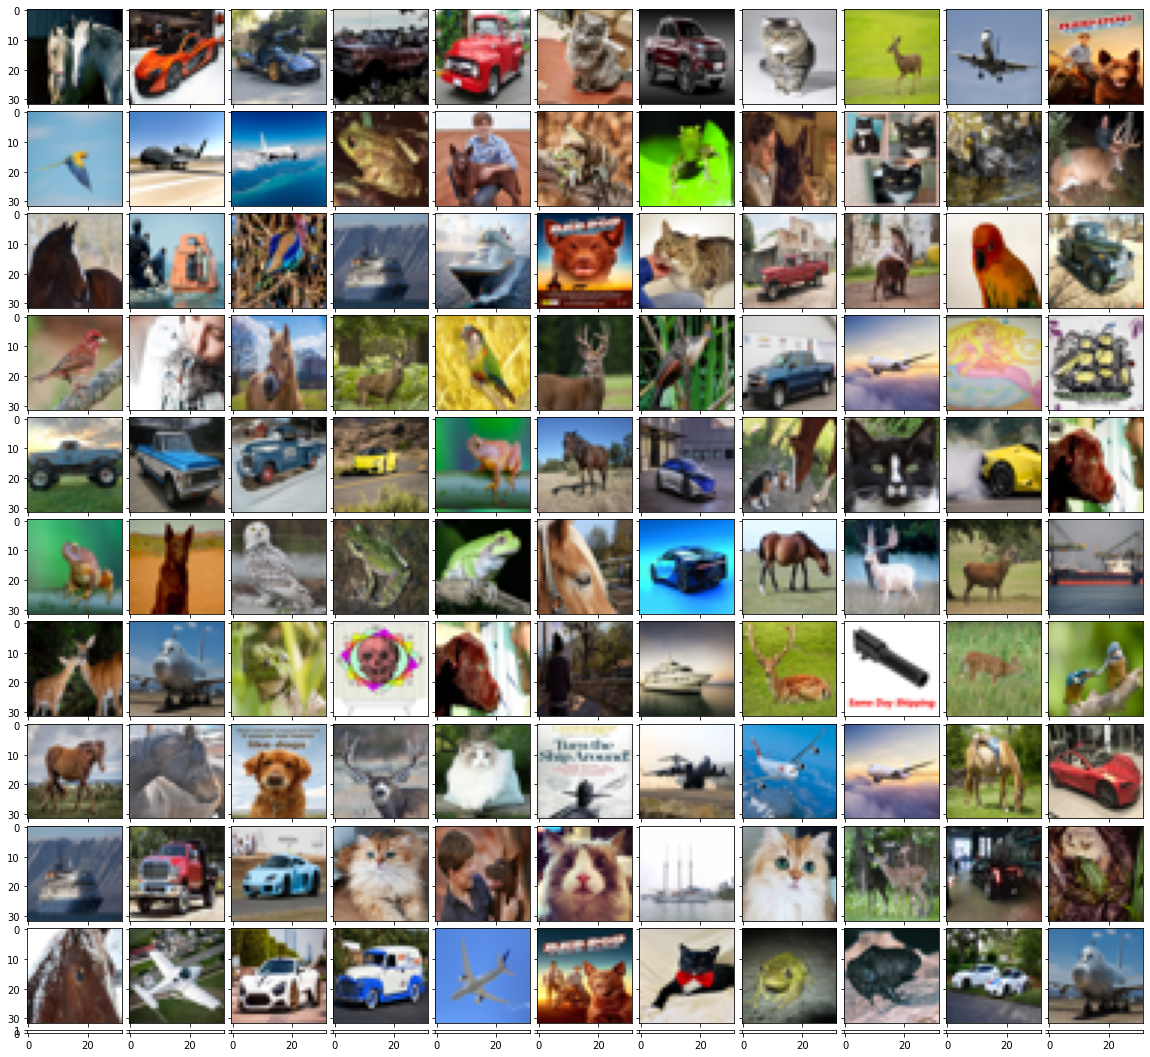

In [8]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(11, 11),
                 axes_pad=0.1,
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.show()

# Resize the Images to 32x32

In [16]:
import os
import sys
folder = 'final'

for filename in os.listdir(folder):
    infilename = os.path.join(folder, filename)
    if not os.path.isfile(infilename): continue

    oldbase = os.path.splitext(filename)
    newname = infilename
    if oldbase[1] == 'jpge':
      newname = infilename.replace('jpeg', 'jpg')
    elif oldbase[1] == 'JPG':
      newname = infilename.replace('JPG', 'jpg')
    
    output = os.rename(infilename, newname)

In [17]:
!ls final/*.jpg | wc -l

104


In [18]:
images = list(paths.list_images("/content/final"))

for image in tqdm(images):
    resized_image = img_reshape(image)
    resized_image.save(image)

  0%|          | 0/110 [00:00<?, ?it/s]

# Upload the Images to GCS

In [19]:
from google.colab import auth
auth.authenticate_user()

In [20]:
LOCAL_PATH = '/content/final' #@param {type:"string"}

GCS_PATH = 'gs://batch-prediction-collection-3/' #@param {type:"string"}

In [ ]:
!gsutil cp {LOCAL_PATH}/*.jpg {GCS_PATH}